In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

seed = 1234
np.random.seed(seed)

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
f1 = unpickle("data_batch_1")
f2 = unpickle("data_batch_2")
f3 = unpickle("data_batch_3")
f4 = unpickle("data_batch_4")
f5 = unpickle("data_batch_5")
test = unpickle("test_batch")

In [18]:
X = np.concatenate((f1[b'data'], f2[b'data'], f3[b'data'], f4[b'data']), axis=0)
print(X.shape)
y = f1[b'labels'] + f2[b'labels'] + f3[b'labels'] + f4[b'labels']
print(len(y))

(40000, 3072)
40000


In [21]:
lr = LogisticRegression(penalty='none', solver='lbfgs', max_iter=100)
lr.fit(X, y)

# trainPredict = lr.predict(X)
# trainAccuracy = accuracy_score(y, trainPredict)
validationPredict = lr.predict(f5[b'data'])
validationAccuracy = accuracy_score(f5[b'labels'], validationPredict)
testPredict = lr.predict(test[b'data'])
testAccuracy = accuracy_score(test[b'labels'], testPredict)

print("Validation Accuracy: ", validationAccuracy)
print("Testing Accuracy: ", testAccuracy)

E:\Miniconda\envs\cs178\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Accuracy:  0.4015
Testing Accuracy:  0.3992


In [40]:
cs = [0.001, 0.01, 0.1, 1, 10]
vaList = []
teList = []
for c in cs:
    lr = LogisticRegression(C=c, max_iter=100) #max_iter = 50 / 100 / 200
    lr.fit(X, y)
    validationPredict = lr.predict(f5[b'data'])
    validationAccuracy = accuracy_score(f5[b'labels'], validationPredict)
    vaList.append(validationAccuracy)
    testPredict = lr.predict(test[b'data'])
    testAccuracy = accuracy_score(test[b'labels'], testPredict)
    teList.append(testAccuracy)

E:\Miniconda\envs\cs178\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Miniconda\envs\cs178\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

When c = 0.001 , validation accuracy = 0.4003 , testing accuracy = 0.3974
When c = 0.01 , validation accuracy = 0.4019 , testing accuracy = 0.3967
When c = 0.1 , validation accuracy = 0.4 , testing accuracy = 0.3987
When c = 1 , validation accuracy = 0.3987 , testing accuracy = 0.4012
When c = 10 , validation accuracy = 0.401 , testing accuracy = 0.399


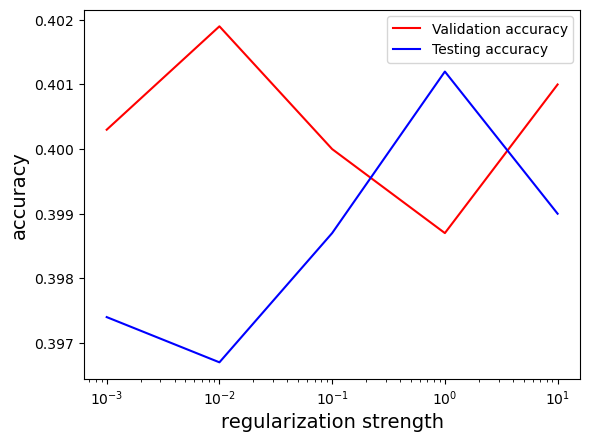

In [41]:
fig, axes = plt.subplots()
axes.semilogx(cs, vaList, color='red', label='Validation accuracy')
axes.semilogx(cs, teList, color='blue', label='Testing accuracy')

axes.set_xlabel('regularization strength', fontsize=14)
axes.set_ylabel('accuracy', fontsize=14)

axes.legend()

for i in range(len(vaList)):
    print("When c =", cs[i], ", validation accuracy =", vaList[i], ", testing accuracy =", teList[i])